In [26]:
!pip -q install langchain-groq
!pip -q install -U langchain_community tiktoken langchainhub
!pip -q install -U langchain langgraph
!pip -q install -U python-dotenv

In [27]:
from dotenv import load_dotenv
import os

# Load the environment variables from the .env file
load_dotenv()

# Get the API key
api_key = os.getenv('GROQ_API_KEY')

In [295]:
from pprint import pprint
from langchain_groq import ChatGroq
from langchain_core.prompts import ChatPromptTemplate
from langchain.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_core.output_parsers import JsonOutputParser
import json

In [296]:
GROQ_LLM = ChatGroq(
            model="llama3-70b-8192",
            model_kwargs={"response_format": {"type": "json_object"}}
        )

## Util function

In [297]:
def print_response(response):
    pretty_json = json.dumps(response, indent=2)
    print(pretty_json)

In [298]:
def JSONtoString(response):
    pretty_json = json.dumps(response, indent=2)
    return pretty_json

## Basic Chains

[x] Generate Project outline

[x] Project to Task breakdown

[x] Task Elaboration

[x] Task improvement router

[x] Task Self reflection

[x] Task Improvement

[x] End Agentflow router

In [299]:
# Generate Project Outline

prompt = PromptTemplate(
    template="""
    Generate project outline for the below input that is project title, project description and technology stack to be used in the project. Return as JSON with three keys -> Project Title, Project Description and Technology Stack. If the user doesn't provide any project input and provides job description or asks for project ideas then choose a suitable project idea yourself

    input = {User Input}
    """,
    input_variables=["User Input"],
)

project_outline_generator = prompt | GROQ_LLM | JsonOutputParser()

# USER_INPUT = """
# Here is a job overview that i had applied:
# The selected candidate will be responsible for developing and implementing computer vision algorithms and models to enhance our AI applications. This role demands a proactive approach to problem-solving and an ability to work collaboratively with technical teams.


# Responsibilities:


#     Design and develop computer vision algorithms and models.
#     Collaborate with interdisciplinary teams to define and achieve project objectives.
#     Stay updated with advancements in AI and computer vision technologies.
#     Enhance model performance and scalability.
#     Adhere to best coding practices and participate in code reviews.
#     Input on the strategic development of AI applications within the security sector.


# Qualifications:


#     Demonstrated experience in Machine Learning and Computer Vision.
#     Advanced degree in Computer Science, Artificial Intelligence, or a related field.
#     Proficiency in Python and frameworks such as TensorFlow or PyTorch.
#     Familiarity with image and video processing techniques.
#     Strong analytical and problem-solving capabilities.
#     Ability to work independently and in a team environment.
#     Excellent communication skills in English.



# For the above overview, I want to do a project to get proficient on the listed requisites above
# """

# project_outline = project_outline_generator.invoke({"User Input": USER_INPUT})

# project_description = project_outline['Project Description']
# project_title = project_outline['Project Title']
# technology_stack = project_outline['Technology Stack']

# print_response(project_outline)

In [300]:
## Project to Task Breakdown
task_breakdown = PromptTemplate(
    template="""
    Understand the Project Requirements - Review the project title and description to get a clear understanding of the project goals. Analyze the technology stack to understand the tools and technologies you'll be working with. Identify Major Components - Divide the project into major components or modules based on the project description. These could be features, functionalities, or phases of the project. Break Down Components into Tasks - For each major component, list the specific tasks needed to complete that component. Ensure that each task is a manageable, concise unit of work. Prioritize and Sequence Tasks - Determine the order in which tasks should be completed, considering dependencies between tasks.


    Here are the project details:
    {project_title}
    {project_description}
    {technology_stack}
    
    Breakdown the Project into modular tasks returning in a JSON format of keys as index (0, 1, 2 ..) and value as task title, makes sure the task title is short and self explanatory. Avoid long jargon task titles. 
    """,
    input_variables=["project_title","project_description", "technology_stack"],
)

task_breakdown_bot = task_breakdown | GROQ_LLM | JsonOutputParser()

# broken_tasks = task_breakdown_bot.invoke({
#     "project_title": project_title, 
#     "project_description":project_description, 
#     "technology_stack":technology_stack
#     })

# print_response(broken_tasks)

In [301]:
task_breakdown = PromptTemplate(
    template="""
    You are an expert in providing detailed guidance for specific tasks based solely on the task title and project details provided. 

    Please follow these guidelines:

        - Use the provided task title to understand the specific requirement.
        - Refer to the project title and description for context and alignment.
        - Consider the technology stack to ensure that your task elaboration is technically accurate and feasible.
        - Ensure Proper JSON Format: The JSON output must adhere to the following rules:
            - Keys and string values must be enclosed in double quotes ("").
            - Special characters within string values must be escaped with a double backslash (\\\\).
            - All JSON elements (objects and arrays) must be correctly closed.
            - Every key must have a corresponding value, and there must be no trailing commas.
            - Trailing Comma: JSON does not allow trailing commas after the last item in an object or array.
            - Quotes: Ensure all keys and string values are enclosed in double quotes.

    Now, please provide the JSON output for the following input:
    Here is the task title:
    {task_title}

    Here are the project details:
    {project_title}
    {project_description}
    {technology_stack}

    Your task is to generate a JSON object with the following keys (Do not change the spelling of the key below strictly):
    - "TASK TITLE"
    - "TASK CONTEXT"
    - "OBJECTIVES"
    - "STEPS AND SUB-TASKS"
    - "TOOLS AND TECHNOLOGIES"
    - "DEPENDENCIES"
    - "EXPECTED CHALLENGES"
    - "EXPECTED OUTCOMES"

    Please ensure your response:
    - Uses clear and specific language to detail each section.
    - Provides context by linking the task to the overall project goals.
    - Includes a step-by-step breakdown of the process required to complete the task.
    - Lists the tools and technologies necessary to accomplish the task, ensuring they align with the specified technology stack.
    - Identifies any dependencies that might affect task completion.
    - Anticipates potential challenges and suggests ways to address them.
    - Clearly states the expected outcome, detailing what a successful completion of the task looks like.

    Here is an example format to follow strictly (Replace curly braces in places of angular brackets):
    <
        "TASK TITLE": "*Task Title*",
        "TASK CONTEXT": "*Task Context*",
        "OBJECTIVES": [
            "*Objective 1*",
            "*Objective 2*"
        ],
        "STEPS AND SUB-TASKS": [
            <
                "STEP": "*Step 1*",
                "SUB-TASKS": [
                    "*Sub-task 1*",
                    "*Sub-task 2*",
                    "*Sub-task 3*"
                ]
            >,
            <
                "STEP": "*Step 2*",
                "SUB-TASKS": [
                    "*Sub-task 1*",
                    "*Sub-task 2*",
                    "*Sub-task 3*"
                ]
            >
        ],
        "TOOLS AND TECHNOLOGIES": [
            "*Tool 1*",
            "*Tool 2*",
            "*Tool 3*"
        ],
        "DEPENDENCIES": [
            "*Dependency 1*",
            "*Dependency 2*"
        ],
        "EXPECTED CHALLENGES": [
            "*Challenge 1*",
            "*Challenge 2*",
            "*Challenge 3*"
        ],
        "EXPECTED OUTCOMES": [
            "*Outcome 1*",
            "*Outcome 2*",
            "*Outcome 3*"
        ]
    >

    Replace curly braces in places of angular brackets for the given example
    """,
    input_variables=["task_title","project_title","project_description", "technology_stack"],
)

task_elaboration_bot = task_breakdown | GROQ_LLM | JsonOutputParser()


In [302]:
# Task Improvement router

self_reflection_needed = PromptTemplate(
    template="""
    You are an expert in analysing tasks and decide if it needs any self reflection or improvement to be made. Give me a score out of 10 in the JSON format with key "Final Score" based on the task elaboration and Rubricks provided.

    1. Clarity of Objectives (1 point)

        0 points: Objectives are unclear or not defined.
        0.5 points: Objectives are partially defined, lacking detail.
        1 point: Objectives are clearly defined and detailed.

    2. Feasibility (1 point)

        0 points: The task is not feasible for a single person.
        0.5 points: The task is somewhat feasible but may require more resources or time than available.
        1 point: The task is completely feasible for a single person given the available resources and time.

    3. Scope and Complexity (1 point)

        0 points: The task is too broad or too complex for a single person to handle.
        0.5 points: The task has a moderate level of complexity and scope.
        1 point: The task has a well-defined scope and an appropriate level of complexity.

    4. Creativity and Innovation (1 point)

        0 points: The task lacks creativity or innovation.
        0.5 points: The task shows some creativity and innovation but is not particularly unique.
        1 point: The task is highly creative and innovative.

    5. Relevance and Impact (1 point)

        0 points: The task is not relevant or impactful.
        0.5 points: The task has moderate relevance and impact.
        1 point: The task is highly relevant and has a significant impact.

    6. Resource Allocation (1 point)

        0 points: Resources required for the task are not well-defined or are unrealistic.
        0.5 points: Some resources are well-defined, but there are gaps.
        1 point: All necessary resources are clearly defined and realistic.

    7. Timeline and Milestones (1 point)

        0 points: There is no clear timeline or milestones.
        0.5 points: The timeline and milestones are partially defined but lack detail.
        1 point: The timeline and milestones are clearly defined and detailed.

    8. Quality of Research and Planning (1 point)

        0 points: Research and planning are insufficient or non-existent.
        0.5 points: Some research and planning are evident, but they are incomplete or inadequate.
        1 point: Thorough research and planning are evident.

    9. Implementation Strategy (1 point)

        0 points: There is no clear implementation strategy.
        0.5 points: The implementation strategy is partially defined.
        1 point: The implementation strategy is clearly defined and realistic.

    10. Evaluation and Feedback Mechanisms (1 point)

        0 points: There are no evaluation or feedback mechanisms.
        0.5 points: Evaluation and feedback mechanisms are partially defined.
        1 point: Evaluation and feedback mechanisms are clearly defined and effective.

    Here is the task title:
    {task_title}

    Here are the project details:
    {project_title}
    {project_description}
    {technology_stack}

    Here is the task elaboration:
    {task_elaboration}
    """,
    input_variables=["task_title","project_title","project_description", "technology_stack", "task_elaboration"],
)

self_reflection_route = self_reflection_needed | GROQ_LLM | JsonOutputParser()

# task_needs_self_reflection = self_reflection_route.invoke({
#     "task_title": task_title,
#     "project_title": project_title, 
#     "project_description":project_description, 
#     "technology_stack":technology_stack,
#     "task_elaboration": JSONtoString(elaborated_task)
#     })

# print_response(task_needs_self_reflection)

In [303]:
# Task Self Reflection

self_reflection = PromptTemplate(
    template="""
    Reflect on the task elaboration and provide a self reflection in JSON fromat on the task in order to improve it further.

    Here is the task title:
    {task_title}

    Here are the project details:
    {project_title}
    {project_description}
    {technology_stack}

    Here is the task elaboration:
    {task_elaboration}

    The key of the JSON object should be just "Self Reflection"

    """,
    input_variables=["task_title","project_title","project_description", "technology_stack", "task_elaboration"],
)

self_reflection_bot = self_reflection | GROQ_LLM | JsonOutputParser()

# self_reflection_result = self_reflection_bot.invoke({
#     "task_title": task_title,
#     "project_title": project_title, 
#     "project_description":project_description, 
#     "technology_stack":technology_stack,
#     "task_elaboration": JSONtoString(elaborated_task)
#     })

# print_response(self_reflection_result)

In [304]:
# Task Improvement

improve_task_elaboration = PromptTemplate(
    template = """
    Based on the self reflection, add upon or modify inorder to improve the task elaboration to make it more detailed and informative. More Importantly, the Output format should be in JSON format and no need of escape sequences or new lines.

    Here is the task title:
    {task_title}

    Here are the project details:
    {project_title}
    {project_description}
    {technology_stack}

    Here is the task elaboration:
    {task_elaboration}

    Here is the self reflection:
    {self_reflection_result}


    Your task is to generate a JSON object with the following keys:
    - Task Title 
    - Task Context respective to the project title
    - Objectives
    - Steps and Sub-tasks
    - Tools and Technologies specific to the task
    - Dependencies (specific to the task)
    - Expected Challenges
    - Expected outcome
    
    """,
    input_variables=["task_title","project_title","project_description", "technology_stack", "task_elaboration", "self_reflection_result"],
)

improve_task_elaboration_bot = improve_task_elaboration | GROQ_LLM | JsonOutputParser()
# improved_task = improve_task_elaboration_bot.invoke({
#     "task_title": task_title,
#     "project_title": project_title, 
#     "project_description":project_description, 
#     "technology_stack":technology_stack,
#     "task_elaboration": JSONtoString(elaborated_task),
#     "self_reflection_result": JSONtoString(self_reflection_result['Self Reflection'])
#     })

# print_response(improved_task)

In [305]:
from langgraph.graph import END, StateGraph

In [306]:
from typing import List, Dict
from typing_extensions import TypedDict, Literal

class ProjectState(TypedDict):
    user_input: str
    project_title: str
    project_description: str
    technology_stack: List[str]
    task_breakdown: Dict[str, str]
    task_elaboration: List[Dict[str, str]]
    self_reflection_score: float
    # self_reflection_review: Dict[str, str] = Field(default_factory=dict, description="Self-reflection review as a dictionary that can be changed often")
    number_of_steps: int  # Non-negative integer
    number_of_tasks_finished: int  # Non-negative integer


## Nodes

1. Project outline
2. Task Breakdown
3. Describe Task
4. Task self-reflective analysis
5. Task Improvement
6. Task router
7. End task

In [307]:
def outline_of_the_project(state):
    """Drafting outline of the project based on the user input"""
    print("---Outline for the project---")
    USER_INPUT = state['user_input']
    number_of_steps = int(state['number_of_steps'])
    number_of_steps += 1

    project_outline = project_outline_generator.invoke({"User Input": USER_INPUT})

    print_response(project_outline)


    project_description = project_outline['Project Description']
    project_title = project_outline['Project Title']
    technology_stack = project_outline['Technology Stack']


    state['project_title'] = project_title
    state['project_description'] = project_description
    state['technology_stack'] = technology_stack

    return {"project_title": project_title, "project_description": project_description,
    "technology_stack" : technology_stack, "number_of_steps":number_of_steps}

In [308]:
def breakdown_project_into_tasks(state):
    """Breaking down the Project into tasks for better understanding and management"""
    print("---BREAKING DOWN PROJECT INTO TASKS---")
    project_description = state['project_description']
    project_title = state['project_title']
    technology_stack = state['technology_stack']
    number_of_steps = int(state['number_of_steps'])
    number_of_steps += 1

    broken_tasks = task_breakdown_bot.invoke({
    "project_title": project_title, 
    "project_description":project_description, 
    "technology_stack":technology_stack
    })

    state['task_breakdown'] = broken_tasks

    print_response(broken_tasks)

    return {"project_title": project_title, "project_description": project_description,
    "technology_stack" : technology_stack, "number_of_steps":number_of_steps, "task_breakdown": broken_tasks}

In [309]:
def task_elaborate_append(state):
    """Elaborating on the tasks to provide more detailed guidance"""
    print("---Task Elaboration---")
    project_description = state['project_description']
    project_title = state['project_title']
    technology_stack = state['technology_stack']
    number_of_steps = int(state['number_of_steps'])
    number_of_steps += 1
    number_of_tasks_finished = int(state['number_of_tasks_finished'])
    task_to_be_elaborated = state['task_breakdown'][str(number_of_tasks_finished)]
    number_of_tasks_finished += 1

    elaborated_task = task_elaboration_bot.invoke({
    "task_title": task_to_be_elaborated,
    "project_title": project_title, 
    "project_description":project_description, 
    "technology_stack":technology_stack
    })

    print_response(elaborated_task)

    broken_tasks = state['task_breakdown']

    task_elaboration = state['task_elaboration']
    task_elaboration.append(elaborated_task)

    return {"project_title": project_title, "project_description": project_description,
    "technology_stack" : technology_stack, "number_of_steps":number_of_steps, "task_breakdown": broken_tasks, "task_elaboration": task_elaboration, "number_of_steps":number_of_steps, "number_of_tasks_finished": number_of_tasks_finished}

In [310]:
def task_elaborate_route(state):

    print("---Next Task Elaboration---")
    
    number_of_tasks_finished = int(state['number_of_tasks_finished'])
    task_to_be_elaborated = state['task_breakdown']
    
    if number_of_tasks_finished == len(task_to_be_elaborated):
        print("---End of Elaboration - End---")
        return "END"
    else:
        print("---Elaboration of Next Task---")
        state['number_of_tasks_finished'] = number_of_tasks_finished + 1
        return "task_elaborate_append"

## Build the Graph

### Add Nodes

In [311]:

workflow = StateGraph(ProjectState)

# Define the nodes
workflow.add_node("outline_of_the_project", outline_of_the_project)
workflow.add_node("breakdown_project_into_tasks", breakdown_project_into_tasks)
workflow.add_node("task_elaborate_append", task_elaborate_append)
# workflow.add_node("task_self_reflect_analyse", task_self_reflect_analyse)


### Add Edges

In [312]:
workflow.set_entry_point("outline_of_the_project")
workflow.add_edge("outline_of_the_project", "breakdown_project_into_tasks")
workflow.add_edge("breakdown_project_into_tasks", "task_elaborate_append")
# workflow.add_edge("task_elaborate_append", "task_self_reflect_analyse")
workflow.add_conditional_edges(
    "task_elaborate_append",
    task_elaborate_route,
    {
        "task_elaborate_append": "task_elaborate_append",
        "END": END
    }
)
workflow.add_edge("task_elaborate_append", END)

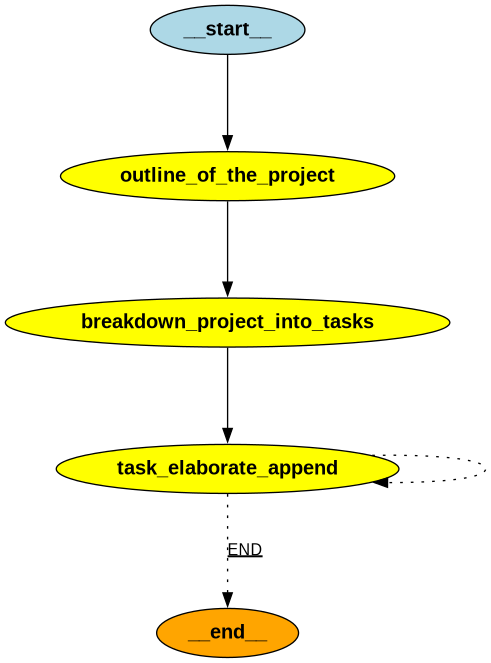

In [313]:
from IPython.display import Image

app = workflow.compile()

display(Image(app.get_graph().draw_png()))

In [314]:
inp = """
Here is a job overview that i had applied:
Responsibilities:

    Design and develop machine learning models
    Preprocess and analyze large datasets
    Implement and optimize algorithms for performance and scalability
    Fine-tune large language models (LLMs) for specific applications
    Manage and analyze big data to derive insights and improve models
    Collaborate with cross-functional teams to integrate AI solutions
    Stay up-to-date with the latest advancements in AI and ML technologies

Requirements

Requirements:

    Bachelor's or Master's degree in Computer Science, Data Science, or a related field
    Proficiency in Python and ML frameworks such as TensorFlow, PyTorch, or scikit-learn
    Experience with data preprocessing and feature engineering
    Strong understanding of machine learning algorithms and techniques
    Proven experience in fine-tuning large language models
    Experience with big data tools and technologies (e.g., Hadoop, Spark)
    Excellent problem-solving and analytical skills




For the above overview, I want to do a project to get proficient on the listed requisites above
"""

In [315]:

inputs = {"user_input": inp, "number_of_steps": 0, "number_of_tasks_finished": 0, "task_elaboration": [], "self_reflection_score": 0}
for output in app.stream(inputs):
    for key, value in output.items():
        pprint(f"Finished running: {key}:")

---Outline for the project---
{
  "Project Title": "Large Language Model Fine-Tuning and Big Data Analysis",
  "Project Description": "This project aims to design and develop machine learning models, preprocess and analyze large datasets, fine-tune large language models for specific applications, and manage and analyze big data to derive insights and improve models. The project will utilize Python and ML frameworks such as TensorFlow, PyTorch, or scikit-learn, and will involve working with big data tools and technologies like Hadoop and Spark.",
  "Technology Stack": [
    "Python",
    "TensorFlow",
    "PyTorch",
    "scikit-learn",
    "Hadoop",
    "Spark"
  ]
}
'Finished running: outline_of_the_project:'
---BREAKING DOWN PROJECT INTO TASKS---
{
  "0": "Design Machine Learning Models",
  "1": "Select Large Language Models",
  "2": "Preprocess Large Datasets",
  "3": "Fine-Tune Language Models",
  "4": "Develop Data Analysis Pipeline",
  "5": "Set up Big Data Environment",
  "6": "I

RateLimitError: Error code: 429 - {'error': {'message': 'Rate limit reached for model `llama3-70b-8192` in organization `org_01hwb1jv9efsgrawa1z5762ff2` on tokens per minute (TPM): Limit 6000, Used 5816, Requested 1021. Please try again in 8.368s. Visit https://console.groq.com/docs/rate-limits for more information.', 'type': 'tokens', 'code': 'rate_limit_exceeded'}}

In [ ]:
print_response(output['task_elaborate_append'])

{
  "project_title": "Large Language Model Fine-Tuning for Text Classification",
  "project_description": "Develop a machine learning model that fine-tunes a large language model (LLM) for text classification tasks, utilizing Python and ML frameworks such as TensorFlow or PyTorch. The project will involve preprocessing and analyzing large datasets, implementing and optimizing algorithms for performance and scalability, and deriving insights from big data to improve the model.",
  "technology_stack": [
    "Python",
    "TensorFlow",
    "PyTorch",
    "scikit-learn",
    "Hadoop",
    "Spark"
  ],
  "task_breakdown": {
    "0": "Select Large Language Model",
    "1": "Install Required Libraries",
    "2": "Dataset Collection",
    "3": "Data Preprocessing",
    "4": "Data Analysis",
    "5": "Implement Text Classification Algorithm",
    "6": "Fine-Tune LLM for Text Classification",
    "7": "Optimize Algorithm for Performance",
    "8": "Optimize Algorithm for Scalability",
    "9": "